# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [30]:
import pandas as pd
from openpyxl import load_workbook

# Calculando a folha salarial da empresa (Qual foi o gasto total com salários de funcionários da empresa)

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
funcionarios_df['Gastos Totais'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
folhaSalarial_df = funcionarios_df['Gastos Totais']
print("=" * 70)
print("VALOR TOTAL GASTO PELA EMPRESA COM SALÁRIOS DOS FUNCIONÁRIOS".center(70))
print("=" * 70)

print(f"Total da folha salarial mensal é de: R$ {folhaSalarial_df.sum():,}")

     VALOR TOTAL GASTO PELA EMPRESA COM SALÁRIOS DOS FUNCIONÁRIOS     
Total da folha salarial mensal é de: R$ 2,717,493.22


In [31]:
# Extraindo o faturamento total da empresa (Qual o faturamento da empresa?)

dados_df = pd.read_excel('BaseServiçosPrestados.xlsx')
cliente_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
dados_df = dados_df.merge(cliente_df, on='ID Cliente')
dados_df['Faturamento Empresarial'] = dados_df['Tempo Total de Contrato (Meses)'] * dados_df['Valor Contrato Mensal']
faturamentoTotal = dados_df['Faturamento Empresarial'].sum()
print("=" * 70)
print("FATURAMENTO TOTAL DA EMPRESA".center(70))
print("=" * 70)
print(f"Fatutamento total: R${faturamentoTotal:,}")

                     FATURAMENTO TOTAL DA EMPRESA                     
Fatutamento total: R$5,519,160


In [32]:
# Analisando o % de funcionarios que ja fecharam algum serviço

print("=" * 70)
print("O PERCENTUAL DE FUNCIONÁRIOS QUE JA FECHARAM SERVIÇOS NA EMPRESA".center(70))
print("=" * 70)

# Extraindo todos os funcionários que ja fecharam algum serviço
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')
funcionarios_Serv_Fechado = servicos_df['ID Funcionário'].unique()
print(f"Total de funcionários que ja fecharam serviços: {len(funcionarios_Serv_Fechado)}")

# Estraindo todos os funcionários, sem nenhuma excessão 
funcionarios_total = len(funcionarios_df['ID Funcionário'])
print(f"Total de funcionário na empresa: {funcionarios_total}")

# Tirando o % dos funcionários que ja fecharam serviços
percentual_Funcionarios = len(funcionarios_Serv_Fechado) / funcionarios_total
print(f"O percentual de funcionários que ja fecharam serviços na empresa: {percentual_Funcionarios:.2%}")

   O PERCENTUAL DE FUNCIONÁRIOS QUE JA FECHARAM SERVIÇOS NA EMPRESA   
Total de funcionários que ja fecharam serviços: 99
Total de funcionário na empresa: 114
O percentual de funcionários que ja fecharam serviços na empresa: 86.84%


In [48]:
# Calculando o total de contratos cada Area ja fechou

novo_funcionarios_df = funcionarios_df[['ID Funcionário', 'Area']]
novo_servicos_df = servicos_df['ID Funcionário']
contratos_area = servicos_df[['ID Funcionário']].merge(novo_funcionarios_df, on='ID Funcionário')
totalArea = contratos_area['Area'].value_counts()

print("=" * 70)
print("QAUNTIDADE DE CONTRATOS FECHADOS POR CADA AREA DA EMPRESA".center(70))
print("=" * 70)

display(totalArea)

      QAUNTIDADE DE CONTRATOS FECHADOS POR CADA AREA DA EMPRESA       


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

              QUANTIDADE TOTAL DE FUNCIONÁRIOS POR AREA               
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<Axes: >

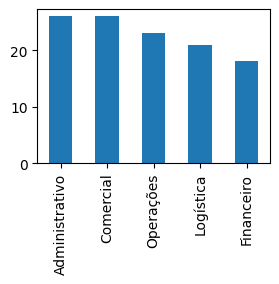

In [56]:
# Calculando a quantidade de funcionários por cada area

qntd_funcionarios_area = funcionarios_df['Area'].value_counts()
print("=" * 70)
print("QUANTIDADE TOTAL DE FUNCIONÁRIOS POR AREA".center(70))
print("=" * 70)
print(qntd_funcionarios_area)
qntd_funcionarios_area.plot(kind='bar', figsize=(3, 2))

In [66]:
# Calculando o faturamento mensal da empresa

# 1ª Forma de ralizar o cálculo

total_faturamento = sum(cliente_df['Valor Contrato Mensal'])
contrato_totais = len(cliente_df['Valor Contrato Mensal'])
media = total_faturamento/contrato_totais

# 2ª Forma de realizar o cálculo

faturamento = cliente_df['Valor Contrato Mensal'].mean()

# Printando valores

print("=" * 70)
print("FATURAMENTO MÉDIO MENSAL DA EMPRESA".center(70))
print("=" * 70)
print(f"O faturamento médio mensal da empresa: R${faturamento:,.2f}")

                 FATURAMENTO MÉDIO MENSAL DA EMPRESA                  
O faturamento médio mensal da empresa: R$2,502.56
